In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('strcom_cfid_dropna.csv')

In [3]:
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
df.iloc[:,1923]

0       0
1       0
2       0
3       0
4       1
       ..
2858    0
2859    1
2860    1
2861    0
2862    1
Name: piezo_cl, Length: 2863, dtype: int64

In [6]:
dist = np.load('dist.npy')

In [7]:
dist

array(['vpa', 'spacegroup_num', 'avg_dev neighbor distance variation',
       ..., 'jml_C-34', 'jml_C-19', 'jml_C-22'], dtype='<U47')

In [8]:
def RFC(X,y,rfc):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
    
    rfc.fit(X_train,y_train)
    
    y_pred = rfc.predict(X_test)
    y_predprob = rfc.predict_proba(X_test)[:,1]
    return(metrics.roc_auc_score(y_test, y_predprob),metrics.accuracy_score(y_test,y_pred))

In [9]:
for i in range(50):
    df1 = df[dist[0:i+1]]
    x1 = df1.values
    y1 = df.iloc[:,1923].values
    
    rfc = RandomForestClassifier()
    
    print(RFC(x1,y1,rfc),i)

(0.5724711270410195, 0.68760907504363) 0
(0.7711469534050179, 0.7818499127399651) 1
(0.810284747112704, 0.8307155322862129) 2
(0.8208781362007168, 0.8394415357766143) 3
(0.8461967343687774, 0.8359511343804538) 4
(0.8438769414575865, 0.8342059336823735) 5
(0.8611608920748706, 0.849912739965096) 6
(0.8519713261648745, 0.8534031413612565) 7
(0.8595081640780565, 0.849912739965096) 8
(0.8655416168857029, 0.8586387434554974) 9
(0.8742831541218637, 0.8551483420593369) 10
(0.8653723616089208, 0.8621291448516579) 11
(0.8726602947033055, 0.8586387434554974) 12
(0.860941855834329, 0.8516579406631762) 13
(0.8693349263241736, 0.8551483420593369) 14
(0.8753783353245719, 0.8568935427574171) 15
(0.8740541616885703, 0.8603839441535777) 16
(0.8718339307048985, 0.849912739965096) 17
(0.8596774193548387, 0.849912739965096) 18
(0.8677518916766228, 0.8464223385689355) 19
(0.8707885304659498, 0.8656195462478184) 20
(0.8591696535244923, 0.8586387434554974) 21
(0.8679808841099163, 0.8586387434554974) 22
(0.864

In [14]:
df_x = df[dist[0:16]]

In [15]:
X = df_x.values
y = df.iloc[:,1923].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

y_predprob = rfc.predict_proba(X_test)[:,1]
print(metrics.roc_auc_score(y_test, y_predprob))

0.865173237753883


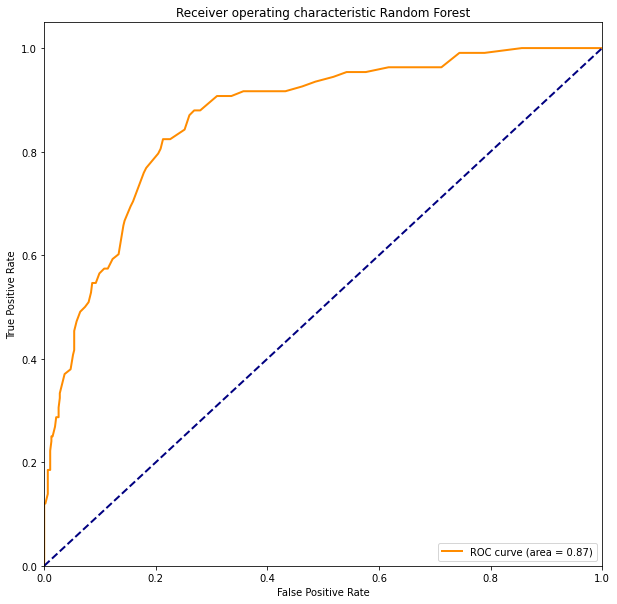

In [18]:
fpr,tpr,threshold=metrics.roc_curve(y_test,y_predprob)

roc_auc=metrics.auc(fpr,tpr)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Random Forest')
plt.legend(loc="lower right")
plt.show()

In [32]:
param_test1 = {'n_estimators':range(310,380,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X,y)
gsearch1.best_params_, gsearch1.best_score_  #330

({'n_estimators': 330}, 0.8008737643910958)

In [37]:
param_test2 = {'max_depth':range(7,10), 'min_samples_split':range(1,10,2)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc', cv=5)
gsearch2.fit(X,y)
gsearch2.best_params_, gsearch2.best_score_         #9,3

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 442, in fit
    trees = Parallel(
  File "C:\Users\admin\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\admin\anaconda3\lib\site-packages\jo

({'max_depth': 9, 'min_samples_split': 3}, 0.8028416718605997)

In [39]:
param_test3 = {'min_samples_split':range(2,10,2), 'min_samples_leaf':range(2,10,2)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, max_depth=13,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc', cv=5)
gsearch3.fit(X,y)
gsearch3.best_params_, gsearch3.best_score_   #2,6

({'min_samples_leaf': 2, 'min_samples_split': 6}, 0.823484620932813)

In [40]:
param_test4 = {'max_features':range(3,11,2)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 60, max_depth=13, min_samples_split=120,
                                  min_samples_leaf=20 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc', cv=5)
gsearch4.fit(X,y)
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 3}, 0.7949917041300992)

In [42]:
rfc1 = RandomForestClassifier(n_estimators= 330, max_depth=9, min_samples_split=2 ,min_samples_leaf=6 ,oob_score=True, random_state=10)
RFC(X,y,rfc1)

(0.8518916766228594, 0.8586387434554974)

In [43]:
rfc = RandomForestClassifier()
RFC(X,y,rfc)

(0.8624253285543608, 0.8638743455497382)